#WEB-SCRAPING PROJECT ON WORLD POPULATION IN THE YEAR 2020#

**INTRODUCTION**

This is a Web-Scraping Project on Population of World in the year 2020 based on the United Nations Population Division estimates. The Table includes columns like Country, Population, Yearly Change, Net Change, Density, Land Area, Migrants, Fertility Rate, Median Age, Urban Population Percentage, World Share Percentage.

**Features(Columns) Understanding** 

Country (or dependency)	-		Name of the country

Population (2020)	-		Population of the country in a given year

Yearly Change		-	Change in population since last year

Net Change	-		Annual changes in population (Resulting from births and deaths)

Density (P/Km²)		-	Urbanization and Population Density

Land Area (Km²)	-		The area of Land in Square kilometers

Migrants (net)	-		Number of migrants

Fert. Rate	-		Fertility rate (in %)

Med. Age		-	Median age of the Population

Urban Pop %	-		% of the population is living in an Urban area

World Share		-	The share of the world's population (in %)

We have 11 Columns in the Table of World Population(2020) table.

# Part 1 
Steps to perform:

**1. Please scrape the table properly using BeautifulSoup.**



In [ ]:
# Importing the required libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## ALLOWS TO HANDLE THE DEPRECATED WARNINGS
import warnings 
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup

In [ ]:
# Downloading contents of the web page
url = "https://www.worldometers.info/world-population/population-by-country/"
data = requests.get(url).text

In [ ]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table', 'table-striped', 'table-bordered']


In [ ]:
# Creating list with all tables
tables = soup.find_all('table')

table = soup.find('table', class_='table table-striped table-bordered')

In [ ]:
# CREATING THE HEADERS THAT CAN ADD ALL THE COLUMNS NAMES 
headers = []
## IGNORING THE 1ST COLUMN NAME WHICH '#' NO REQUIRED
for i in table.find_all('th')[1:]:
    title = i.text.strip()
    ## APPENDING THE ALL TITLES TO HEADERS 
    headers.append(title)

In [ ]:
# CREATING THE DATAFRAME AS "world_population"
world_population = pd.DataFrame(columns = headers)
world_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [ ]:
# IGNORING THE 1ST ROW WHICH THE COLUMNS NAME ROW
for row in table.find_all('tr')[1:]:
  data = row.find_all('td')
  row_data = [td.text.strip() for td in data][1:]
  length = len(world_population)
  ## ASSIGNING ALL THE VALUES TO DATAFRAME
  world_population.loc[length] = row_data            
world_population 

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63 %,"158,490",89,"111,890","-6,800",2.5,24,57 %,0.13 %
1,United Arab Emirates,"9,890,402",1.23 %,"119,873",118,"83,600","40,000",1.4,33,86 %,0.13 %
2,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,2.8,27,79 %,0.01 %
3,Saint Barthelemy,"9,877",0.30 %,30,470,21,,N.A.,N.A.,0 %,0.00 %
4,Seychelles,"98,347",0.62 %,608,214,460,-200,2.5,34,56 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,"10,203,134",1.00 %,"101,440",115,"88,780","10,220",2.8,24,91 %,0.13 %
231,Portugal,"10,196,709",-0.29 %,"-29,478",111,"91,590","-6,000",1.3,46,66 %,0.13 %
232,Azerbaijan,"10,139,177",0.91 %,"91,459",123,"82,658","1,200",2.1,32,56 %,0.13 %
233,Sweden,"10,099,265",0.63 %,"62,886",25,"410,340","40,000",1.9,41,88 %,0.13 %


In [ ]:
world_population.head()  # Getting first rows from dataframe

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63 %,"158,490",89,"111,890","-6,800",2.5,24,57 %,0.13 %
1,United Arab Emirates,"9,890,402",1.23 %,"119,873",118,"83,600","40,000",1.4,33,86 %,0.13 %
2,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,2.8,27,79 %,0.01 %
3,Saint Barthelemy,"9,877",0.30 %,30,470,21,,N.A.,N.A.,0 %,0.00 %
4,Seychelles,"98,347",0.62 %,608,214,460,-200,2.5,34,56 %,0.00 %


In [ ]:
world_population.tail()  # Last five rows

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Jordan,"10,203,134",1.00 %,"101,440",115,"88,780","10,220",2.8,24,91 %,0.13 %
231,Portugal,"10,196,709",-0.29 %,"-29,478",111,"91,590","-6,000",1.3,46,66 %,0.13 %
232,Azerbaijan,"10,139,177",0.91 %,"91,459",123,"82,658","1,200",2.1,32,56 %,0.13 %
233,Sweden,"10,099,265",0.63 %,"62,886",25,"410,340","40,000",1.9,41,88 %,0.13 %
234,India,0,-100.00 %,"-1,366,417,754",0,"2,973,190","-532,687",2.2,28,N.A.,0.00 %


**2. Once the table is scraped, perform some basic data cleaning steps.**

In [ ]:
world_population.size # to check size of dataframe

2585

In [ ]:
world_population = world_population.replace('\%', '', regex = True)  # REPLACING THE SPECIAL CHARECTER '%' WITH ''
world_population = world_population.replace('\,', '', regex = True) # REPLACING THE SPECIAL CHARECTER '\,' WITH ''
world_population = world_population.replace('', np.nan)  # REPLACING ' ' WITH NAN 
wp = world_population.replace('N.A.', np.nan) # REPLACING STRING 'N.A.' WITH NaN and saving data in wp
wp 

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800,2.5,24,57,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000,1.4,33,86,0.13
2,Djibouti,988000,1.48,14440,43,23180,900,2.8,27,79,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0,0.00
4,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220,2.8,24,91,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000,1.9,41,88,0.13


In [ ]:
world_population.info() # To Get information of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    object
 4   Density (P/Km²)          235 non-null    object
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           201 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


All the columns are in object datatype, except 'Country' variable remaining all the variables are not object type data. So, converting remaining all the variables data types.

In [ ]:
## CONVERTING DATA TYPE INTO 'FLOAT' and 'INT' TYPE DATA 

wp['Yearly Change'] = wp['Yearly Change'].astype(float)
wp['Fert. Rate'] = wp['Fert. Rate'].astype(float)
wp['Med. Age'] = wp['Med. Age'].astype(float)
wp['Urban Pop %'] = wp['Urban Pop %'].astype(float)
wp['World Share'] = wp['World Share'].astype(float)
wp['Migrants (net)'] = wp['Migrants (net)'].astype(float)
wp['Population (2020)'] = wp['Population (2020)'].astype(int)
wp['Net Change'] = wp['Net Change'].astype(int)
wp['Density (P/Km²)'] = wp['Density (P/Km²)'].astype(int)
wp['Land Area (Km²)'] = wp['Land Area (Km²)'].astype(int)

wp.info() # CHECKING INFORMATION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              221 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 22.0+ KB


In [ ]:
wp # READING THE DATA FRAME TO  CHECK ALL THE VARIABLES AND OBSERVATIONS.

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800.0,2.5,24.0,57.0,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000.0,1.4,33.0,86.0,0.13
2,Djibouti,988000,1.48,14440,43,23180,900.0,2.8,27.0,79.0,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.00
4,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220.0,2.8,24.0,91.0,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200.0,2.1,32.0,56.0,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000.0,1.9,41.0,88.0,0.13


In [ ]:
wp.describe() # Checking for the statistical measures for all numerical data

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,221.000000,235.000000
mean,2.729884e+07,0.674553,-5.526253e+06,476.434043,5.535918e+05,-5.442786,2.692040,30.621891,59.556561,0.350170
std,1.023724e+08,6.682487,8.915707e+07,2331.491161,1.687796e+06,123292.057588,1.264253,9.119557,24.097958,1.313615
min,0.000000e+00,-100.000000,-1.366418e+09,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,3.988760e+05,0.310000,3.875000e+02,35.500000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.421241e+06,0.970000,3.774200e+04,94.000000,7.724000e+04,-960.000000,2.300000,30.000000,62.000000,0.070000
75%,1.974426e+07,1.850000,2.288515e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.255000
max,1.439324e+09,3.840000,5.540090e+06,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [ ]:
wp.nunique() # checking for the unique values of all the variables 

Country (or dependency)    235
Population (2020)          235
Yearly Change              174
Net Change                 234
Density (P/Km²)            164
Land Area (Km²)            226
Migrants (net)             158
Fert. Rate                  50
Med. Age                    34
Urban Pop %                 80
World Share                 73
dtype: int64

In [ ]:
wp.nunique().sum() # checking for the all the unique values of the data

1663

**3. Please report number of rows and columns**

In [ ]:
wp.shape # to check rows and columns

(235, 11)

*We have 235 rows and 11 columns in the table*

**4. Please report if there is any missing value in the dataset. (Do not remove or fill it)**

In [ ]:
wp.isnull().sum() # to check missing values in dataframe or dataset

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                14
World Share                 0
dtype: int64

*We have 34 missing values in the columns-Migrants Fertility Rate and Median Age, 14 missing values in Urban Population*

**5. Please rename the columns appropriately.**

In [ ]:
wp = wp.rename(columns = {'Country (or dependency)' : 'Country', 'Population (2020)' : 'Population', 
                            'Density (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Land Area',
                           'Migrants (net)' : 'Migrants', 'Urban Pop %' : 'Urban Population', 'Fert. Rate' : 'Fertility Rate',
                           'Med. Age' : 'Median Age'})  # Renaming all columns in the dataframe
wp

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800.0,2.5,24.0,57.0,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000.0,1.4,33.0,86.0,0.13
2,Djibouti,988000,1.48,14440,43,23180,900.0,2.8,27.0,79.0,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.00
4,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,10203134,1.00,101440,115,88780,10220.0,2.8,24.0,91.0,0.13
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
232,Azerbaijan,10139177,0.91,91459,123,82658,1200.0,2.1,32.0,56.0,0.13
233,Sweden,10099265,0.63,62886,25,410340,40000.0,1.9,41.0,88.0,0.13


**6. Please report the top ten and bottom ten countries based on the density column..**

In [ ]:
wp.sort_values(by = ['Density'], ascending = False).head(10) # SORTING THE VALUES OF DENSITY TO GET TOP TEN VALUES BY GIVING 'HEAD'

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
102,Monaco,39242,0.71,278,26337,1,NaN,NaN,NaN,NaN,0.00
43,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
56,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08
29,Hong Kong,7496981,0.82,60827,7140,1050,29308.0,1.3,45.0,NaN,0.10
117,Gibraltar,33691,-0.03,-10,3369,10,NaN,NaN,NaN,NaN,0.00
182,Bahrain,1701575,3.68,60403,2239,760,47800.0,2.0,32.0,89.0,0.02
24,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
69,Maldives,540544,1.81,9591,1802,300,11370.0,1.9,30.0,35.0,0.01
87,Malta,441543,0.27,1171,1380,320,900.0,1.5,43.0,93.0,0.01
186,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11


*Top Ten Countries based on density column are  Monaco, Macao, Singapore,   Hong- Kong, Gibraltar, Bahrain, Holy See, Maldives, Malta and Bangladesh.*

In [ ]:
wp.sort_values(by = ['Density'], ascending = False).tail(10) # SORTING THE VALUES OF DENSITY TO GET TOP TEN VALUES BY GIVING 'tail'

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
154,Botswana,2351627,2.08,47930,4,566730,3000.0,2.9,24.0,73.0,0.03
129,French Guiana,298682,2.70,7850,4,82200,1200.0,3.4,25.0,87.0,0.00
150,Namibia,2540905,1.86,46375,3,823290,-4806.0,3.4,22.0,55.0,0.03
115,Iceland,341243,0.65,2212,3,100250,380.0,1.8,37.0,94.0,0.00
149,Australia,25499884,1.18,296686,3,7682300,158246.0,1.8,38.0,86.0,0.33
52,Western Sahara,597339,2.55,14876,2,266000,5582.0,2.4,28.0,87.0,0.01
123,Mongolia,3278290,1.65,53123,2,1553560,-852.0,2.9,28.0,67.0,0.04
60,Greenland,56770,0.17,98,0,410450,NaN,NaN,NaN,87.0,0.00
113,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
234,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.00


*The Bottom ten Countries based on Density Column are Botswana, French Guiana, Namibia, Iceland, Australia, Western Sahara, Mongolia, Greenland, Falkland Islands and India.*

**7. Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.**

In [ ]:
wp_country = wp.loc[wp['Fertility Rate'] == wp['Fertility Rate'].max()] # max() to get high value and loc() function helps us to retrieve data values from a dataset at an ease.
wp_country 

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
151,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


*Niger has the highest Fertility Rate with 7.0*

In [ ]:
wp_country = wp.loc[wp['Fertility Rate'] == wp['Fertility Rate'].min()] # max() to get low value
wp_country 

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
72,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66


*South Korea has lowest Fertility Rate with 1.1*

In [ ]:
wp.sort_values(by = ['Fertility Rate'], ascending = False).head(10) # To get highest values in Fertility Rate column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
151,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31
190,Somalia,15893222,2.92,450317,25,627340,-40000.0,6.1,17.0,47.0,0.20
12,DR Congo,89561403,3.19,2770836,40,2267050,23861.0,6.0,17.0,46.0,1.15
165,Mali,20250833,3.02,592802,17,1220190,-40000.0,5.9,16.0,44.0,0.26
187,Chad,16425864,3.00,478988,13,1259200,2000.0,5.8,17.0,23.0,0.21
121,Angola,32866272,3.27,1040977,26,1246700,6413.0,5.6,17.0,67.0,0.42
208,Burundi,11890784,3.12,360204,463,25680,2001.0,5.5,17.0,14.0,0.15
164,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
152,Gambia,2416668,2.94,68962,239,10120,-3087.0,5.3,18.0,59.0,0.03
161,Burkina Faso,20903273,2.86,581895,76,273600,-25000.0,5.2,18.0,31.0,0.27


*The Top Ten Countries based on 'Fertility Rate' are Niger, Somalia, DR Congo, Mali, Chad, Angola, Burundi, Nigeria, Gambia and Burkina Faso.*

In [ ]:
wp.sort_values(by = ['Fertility Rate'], ascending = True).head(10) # To get lowest values in Fertility Rate column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
72,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66
153,Taiwan,23816775,0.18,42899,673,35410,30001.0,1.2,42.0,79.0,0.31
43,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
137,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986.0,1.2,44.0,NaN,0.04
56,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08
96,Moldova,4033963,-0.23,-9300,123,32850,-1387.0,1.3,38.0,43.0,0.05
206,Cyprus,1207359,0.73,8784,131,9240,5000.0,1.3,37.0,67.0,0.02
83,Spain,46754778,0.04,18002,94,498800,40000.0,1.3,45.0,80.0,0.60
122,Bosnia and Herzegovina,3280819,-0.61,-20181,64,51000,-21585.0,1.3,43.0,52.0,0.04
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13


The Bottom Ten Countries based on the 'Fertility Rate' are South Korea, Taiwan, Macao, Puerto Rico, Singapore, Moldova, Cyprus, Spain, Bosnia and Herzegovina, Portugal.

**8. Report top 5 largest countries in this world based on land area.**

In [ ]:
wp.sort_values(by = ['Land Area'], ascending = False).head(5) # To get highest values in Land Area column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
193,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
194,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
119,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
108,Canada,37742154,0.89,331107,4,9093510,242032.0,1.5,41.0,81.0,0.48
160,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73


*The Top 5 larges Countries bases on 'Land Area' are Russia, China, United States, Canada and Brazil.*

**9. Report top 5 countries in this world based on median value.**

In [ ]:
wp.sort_values(by = ['Median Age'], ascending = False).head(5) # To get highest values in Median Age column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
204,Japan,126476461,-0.30,-383840,347,364555,71560.0,1.4,48.0,92.0,1.62
109,Martinique,375265,-0.08,-289,354,1060,-960.0,1.9,47.0,92.0,0.00
49,Italy,60461826,-0.15,-88249,206,294140,148943.0,1.3,47.0,69.0,0.78
231,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46.0,66.0,0.13
228,Greece,10423054,-0.48,-50401,81,128900,-16000.0,1.3,46.0,85.0,0.13


The Top 5 Countries based on 'Median Age' are Japan, Martinique, Italy, Portugal and Greece.

**10. Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.**

Text(0.5, 1.0, 'Distribution of Population')

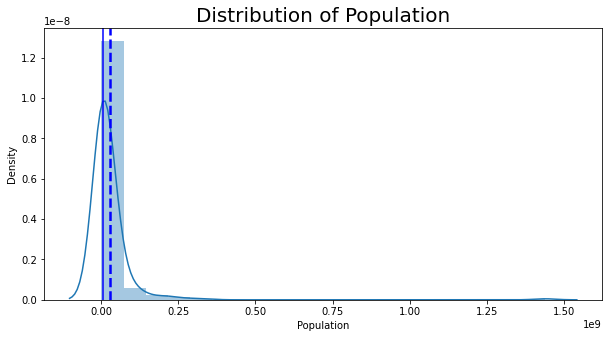

In [ ]:
# VISUALIZING DISTRIBUTION OF 'Population' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(wp['Population'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=wp['Population'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=wp['Population'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show # to show plot

# GIVING TITLE TO PLOT 
plt.title('Distribution of Population',fontsize=20) 

*As we can see through plot, The 'Population' curve is highly skewed to the right so it is right skewed.*

Text(0.5, 1.0, 'Distribution of Median_Age')

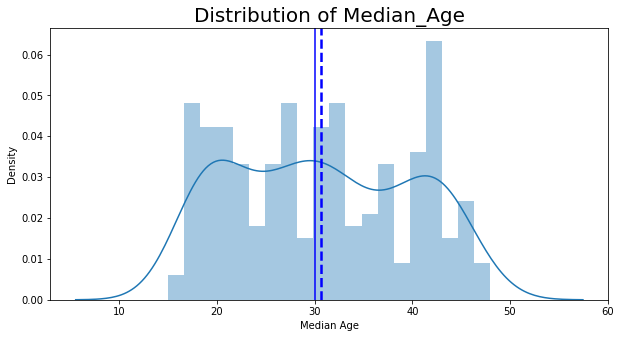

In [ ]:
# VISUALIZING DISTRIBUTION OF 'Median Age' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(wp['Median Age'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=wp['Median Age'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=wp['Median Age'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show # to show plot

# GIVING TITLE TO PLOT 
plt.title('Distribution of Median_Age',fontsize=20) 

*From the Distribution plot we can observe that, The 'Median Age' curve is normally distributed data.*

Text(0.5, 1.0, 'Distribution of Urban_Population')

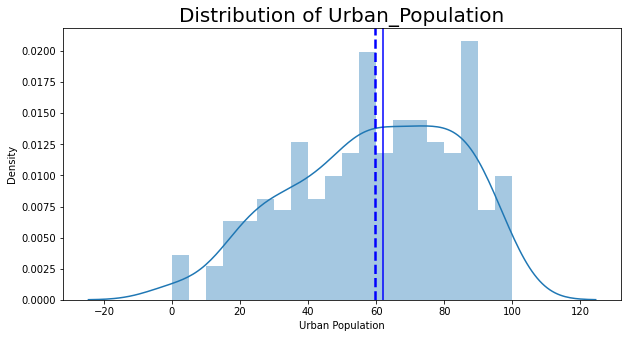

In [ ]:
# VISUALIZING DISTRIBUTION OF 'Urban Population' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(wp['Urban Population'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=wp['Urban Population'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=wp['Urban Population'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show # to show plot

# GIVING TITLE TO PLOT 
plt.title('Distribution of Urban_Population',fontsize=20) 

*From the Distribution Plot, We can see that 'Urban Population' curve is moderately right skewed.*

Text(0.5, 1.0, 'Distribution of Yearly_Change')

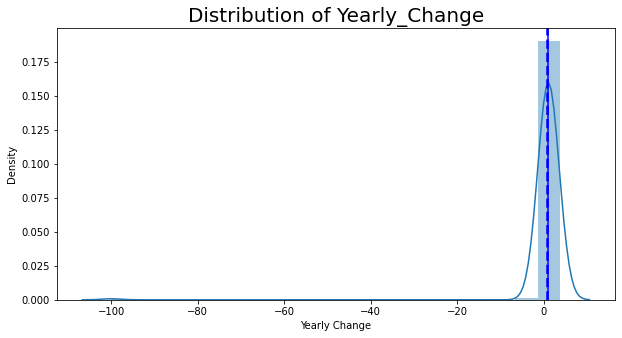

In [ ]:
# VISUALIZING DISTRIBUTION OF 'Yearly Change' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(wp['Yearly Change'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=wp['Yearly Change'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=wp['Yearly Change'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show  # to show plot

# GIVING TITLE TO PLOT 
plt.title('Distribution of Yearly_Change',fontsize=20) 

*As we can observe from distribution plot, The 'Yearly Change' curve is highly left skewed.*

**11. Please sort the population column based on lowest populated countries and report bottom 10 countries as well as top 10 countries.**

In [ ]:
wp.sort_values(by = ['Population'], ascending = True).head(10) # To get Lowest values in Population column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
234,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.0
24,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.0
197,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.0
189,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.0
113,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.0
78,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.0
57,Saint Pierre & Miquelon,5794,-0.48,-28,25,230,NaN,NaN,NaN,100.0,0.0
48,Saint Helena,6077,0.30,18,16,390,NaN,NaN,NaN,27.0,0.0
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.0
223,Nauru,10824,0.63,68,541,20,NaN,NaN,NaN,NaN,0.0


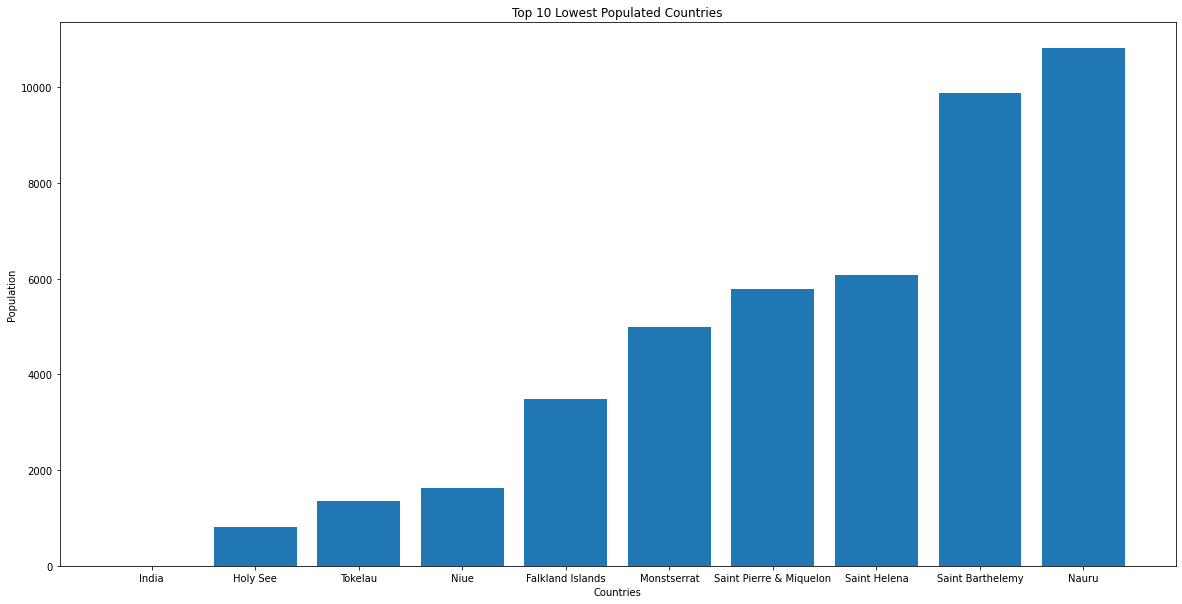

In [ ]:
# Define a data set
data= {'India' : 0, 'Holy See' : 801, 'Tokelau' : 1357, 'Niue' : 1626, 'Falkland Islands': 3480, 'Monstserrat': 4992, 'Saint Pierre & Miquelon': 5794, 'Saint Helena': 6077, 'Saint Barthelemy': 9877, 'Nauru': 10824}
Country = list(data.keys())
Population= list(data.values())

fig = plt.figure(figsize=(20,10))

plt.title("Top 10 Lowest Populated Countries")
plt.xlabel("Countries")
plt.ylabel("Population")

plt.bar(Country,Population)
plt.show()

The result shows lowest 10 countries Population are India, Holy See, Tokelau, Niue, Falkland Islands, Montserrat, Saint Pierre & Miquelon, Saint Helena, Saint Barthelemy and Nauru.

In [ ]:
wp.sort_values(by = ['Population'], ascending = False).head(10) # To get highest values in Population column

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
194,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
119,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
142,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
156,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
160,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73
164,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
186,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11
193,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
202,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29.0,84.0,1.65
204,Japan,126476461,-0.30,-383840,347,364555,71560.0,1.4,48.0,92.0,1.62


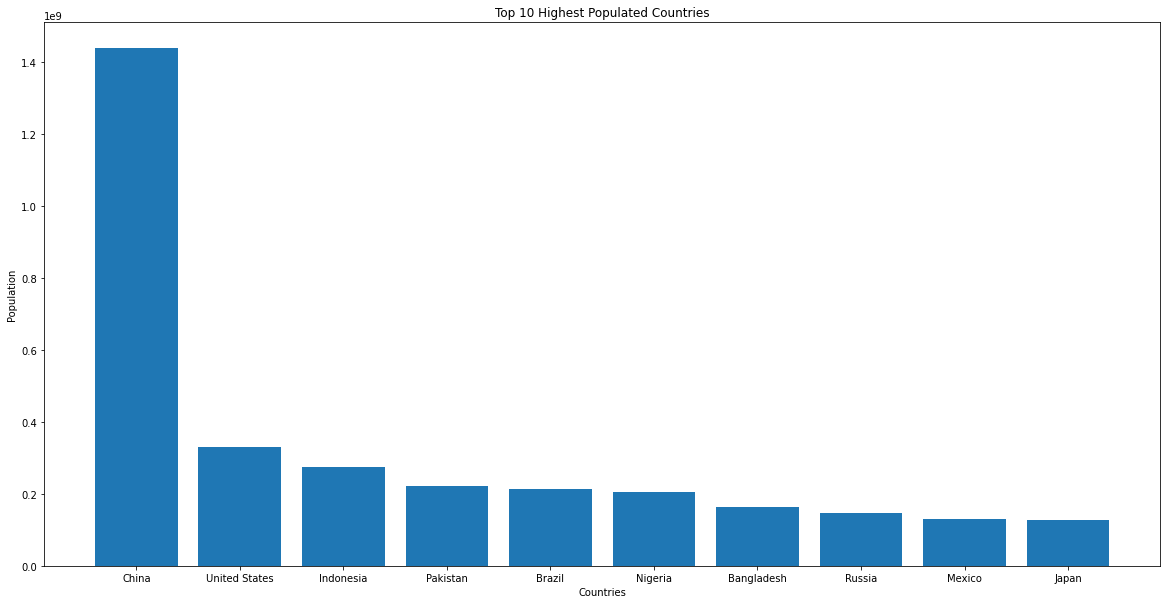

In [ ]:
data= {'China' : 1439323776, 'United States' : 331002651, 'Indonesia' : 273523615, 'Pakistan' : 220892340, 'Brazil': 212559417, 'Nigeria': 206139589, 'Bangladesh': 164689383, 'Russia': 145934462, 'Mexico': 128932753, 'Japan': 126476461}
Country = list(data.keys())
Population= list(data.values())

fig = plt.figure(figsize=(20,10))

plt.title("Top 10 Highest Populated Countries")
plt.xlabel("Countries")
plt.ylabel("Population")

plt.bar(Country,Population)
plt.show()

The Top 10 highest countries Population are China, United States, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico and Japan.

# Part-2

Create the following two classes (standard and student) with the given attributes and methods

 **Standard**

     * Attributes: Std name, No of enrolled students, Overall GPA*
     * Methods: getStd, getEnrolled, getOGPA*

 **Students class with Standard as its super class**

     * Attributes: Name,Roll No., Standard, Math marks, English Marks, Science Marks, Social Marks*
     
     * Methods: getName, getRollNo, getStd, getGPA*

**def** - creates an object and assigns it to a name

**self** - Using Self we can access the attributes and methods of the class

*__init__ () is a special method that is used to initialize the data members of a class. It is the method that is automatically executed when an instance of the class is created in memory.*

In [ ]:
class Standard: 

 def __init__(self, Std_name, No_of_enrolled_Students, Overall_GPA):  # Defining init operator along with attrubutes 
   self.Std_name = Std_name
   self.No_of_enrolled_Students = No_of_enrolled_Students
   self.Overall_GPA = Overall_GPA  

 def getStd(self):
   get_name = self.Std_name
   return get_name
 def getEnrolled(self):
   get_NoEnrolledStudents = self.No_of_enrolled_Students
   return get_NoEnrolledStudents
 def getOGPA(self):
   get_OverallGPA = self.Overall_GPA
   return get_OverallGPA
   

  
class Student(Standard):    # Defining init operator along with attrubutes also Declaring Standard as superclass of Student

  def __init__(self,Name,Roll_No, Standard, Math_Marks, English_Marks, Science_Marks, Social_Marks):
    self.Name = Name
    self.Roll_No = Roll_No
    self.Standard = Standard
    self.Math_Marks = Math_Marks
    self.English_Marks = English_Marks
    self.Science_Marks = Science_Marks
    self.Social_Marks = Social_Marks

  def getName(self):
    get_name = self.Name
    return get_name
  def getRollNo(self):
    get_rollno = self.Roll_No
    return get_rollno
  def getStd(self):
    get_Standard = self.Standard
    return get_Standard
  def getGPA(self):
    get_GPA = (self.Math_Marks + self.English_Marks + self.Science_Marks +self.Social_Marks)/4
    return get_GPA

std = Standard('Rahul','40','10')
print('Student name is',std.Std_name)
print("Total Students enrolled are", std.No_of_enrolled_Students)
print("The Student Overall GPA is", std.Overall_GPA, '\n')
std.getStd()
std.getEnrolled()
std.getOGPA()  

stu1 = Student('Rahul','101','X',8,8,7,9)
print('Student name is',stu1.getName())
print('Student rollno is',stu1.getRollNo())
print('Student standard is',stu1.getStd())
print('Student GPA is',stu1.getGPA())
stu1.getName()  
stu1.getRollNo()
stu1.getStd()    #  getName, getRollNo, getStd methods gives the name, roll number and standard of the student. 
stu1.getGPA()  # getGPA gives the average marks of math, english, science and social marks


Student name is Rahul
Total Students enrolled are 40
The Student Overall GPA is 10 

Student name is Rahul
Student rollno is 101
Student standard is X
Student GPA is 8.0


8.0